## Variable Importance Plotting

This notebook generates visualizations from the Variable Importance calculations.

To use:
1. Set up the working environment as detailed in the README and docs for `Tools/setupLPC.py`.
2. Submit Condor jobs using the `./submit_VariableImportance.sh` script and wait for them to finish.
3. Run the `VariableImportance_Calculation.py` script on the folder where the jobs are stored.
4. **Run this notebook**, specifying the folder where the results of step 3 are stored.

The cells in this notebook will guide you through generating the visualizations.


In [25]:
#Import Libraries
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np

In [27]:
# Choose the folder where the dataset is stored.
print("Dataset Folders in {}:".format(os.getcwd()))
for f in os.listdir(os.getcwd()):
    if os.path.isdir(os.path.join(os.getcwd(), f)):
        if len([i for i in os.listdir(os.path.join(os.getcwd(), f)) if "VariableImportanceResults" in i]) > 0:
            print(" - {}".format(f))
print("Specify path of dataset directory.")
dataset_dir = input("Path: ")

if os.path.exists(os.path.join(os.getcwd(), dataset_dir)):
    dataset_dir = os.path.join(os.getcwd(), dataset_dir)
    
print("Dataset path set to {}.".format(dataset_dir))

# Find the data file.
dataset_files = os.listdir(dataset_dir)
nVars = 0
data_file = None
for f in dataset_files:
    if "VariableImportanceResults" in f:
        data_file = os.path.join(dataset_dir, f)
        nVars = int(data_file[data_file.rfind("_")+1:data_file.rfind("vars")])
print("Found data file {} with {} variables.".format(data_file, nVars))

Dataset Folders in C:\Users\Adam\Google Drive (adam_furman@brown.edu)\UTRA 2020\code\FNAL:
 - dataset
Specify path of dataset directory.


Path:  dataset


Dataset path set to C:\Users\Adam\Google Drive (adam_furman@brown.edu)\UTRA 2020\code\FNAL\dataset.
Found data file C:\Users\Adam\Google Drive (adam_furman@brown.edu)\UTRA 2020\code\FNAL\dataset\VariableImportanceResults_76vars.txt with 76 variables.


In [28]:
# Extract importance values from file and sort

data = {}
normalization = 0

# Read the data file
with open(data_file, "r") as f:
    # Scroll to variable entries
    line = f.readline()
    while not "Normalization" in line:
        line = f.readline()
        if line == "":
            raise IOError("End of File Reached, no data found.")
    # Data reached.
    # Read normalization
    normalization = float(line[line.rfind(" "):])
    # Read headers
    headers = [h.strip().rstrip() for h in f.readline().rstrip().split("/")]
    print("Found data columns: {}".format(", ".join(headers)))
    for h in headers:
        data[h] = []
    # Read data
    line = f.readline().rstrip()
    while line != "":
        content = [c.strip().rstrip() for c in line.split("/")]
        content[0] = content[0].rstrip(".")
        for i, h in enumerate(headers):     
            if i == 1:
                data[h].append(content[i])
            else:
                data[h].append(float(content[i]) if "." in content[i] else int(content[i]))
        line = f.readline().rstrip()
        
value_list_sort, rms_list_sort, variable_list_sort = zip(*sorted(zip(
    data["Sum"], data["RMS"], data["Variable Name"]
)))

Found data columns: Index, Variable Name, Freq., Sum, Mean, RMS, Importance


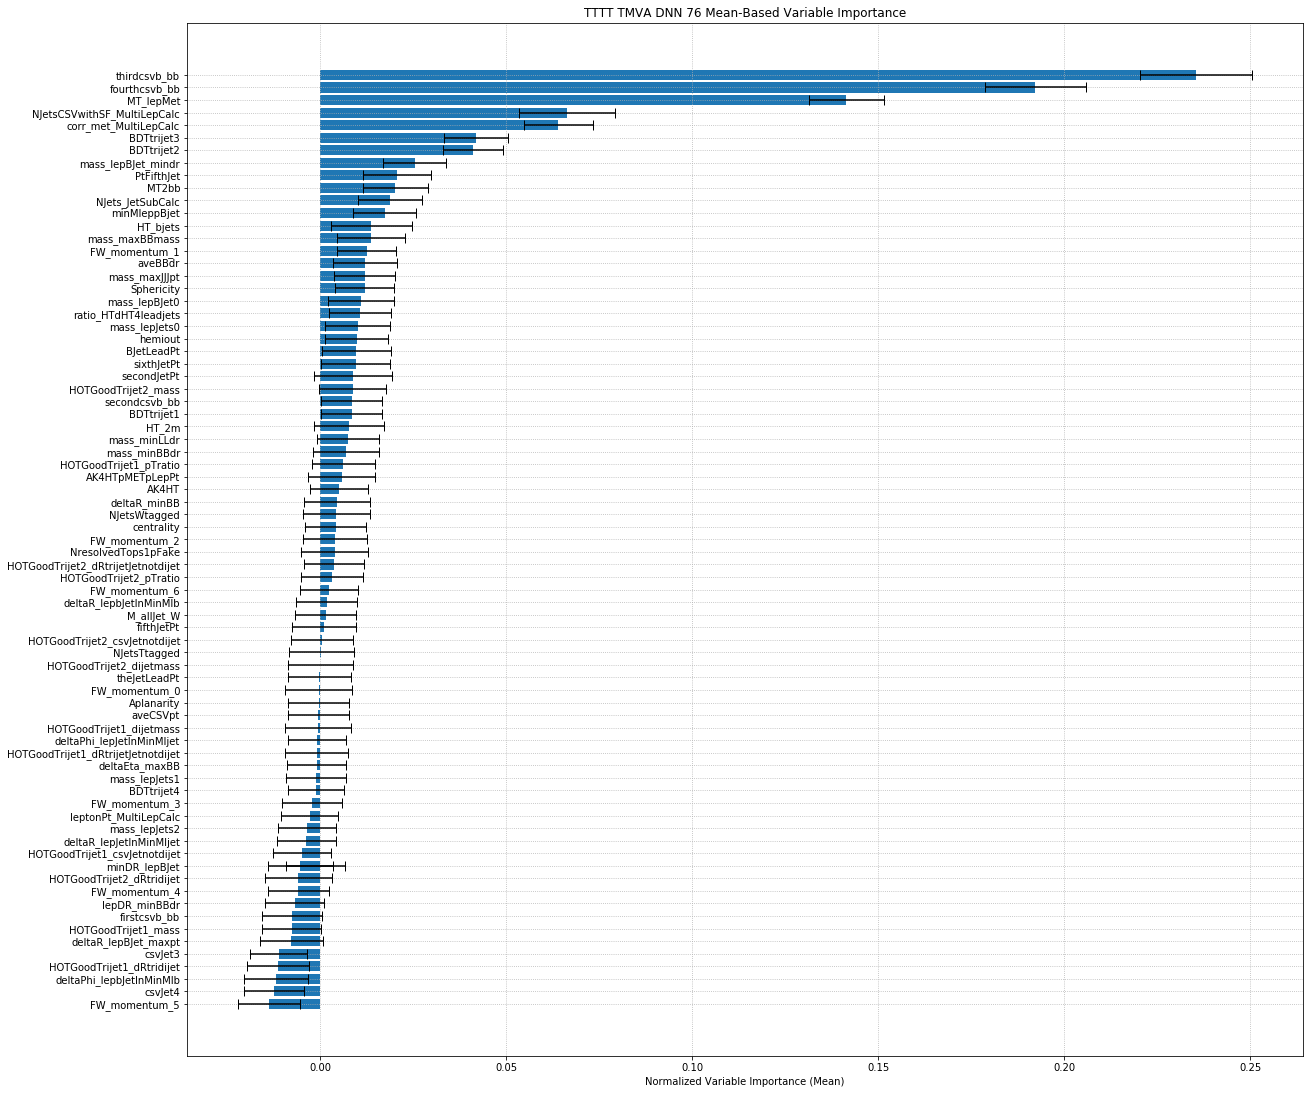

In [29]:
# Plot the mean-based variable importance
plt.close()
plt.figure(figsize=(20, int(nVars/4)))
plt.barh(variable_list_sort, value_list_sort, xerr=rms_list_sort,
         align="center", capsize=5.0)
plt.title("TTTT TMVA DNN " + str(nVars) + " Mean-Based Variable Importance")
plt.grid(which="both", linestyle=":")
plt.xlabel("Normalized Variable Importance (Mean)")
plt.savefig(os.path.join(dataset_dir, "VariableImportanceResults_" + str(nVars) + "vars.png"))
plt.show()

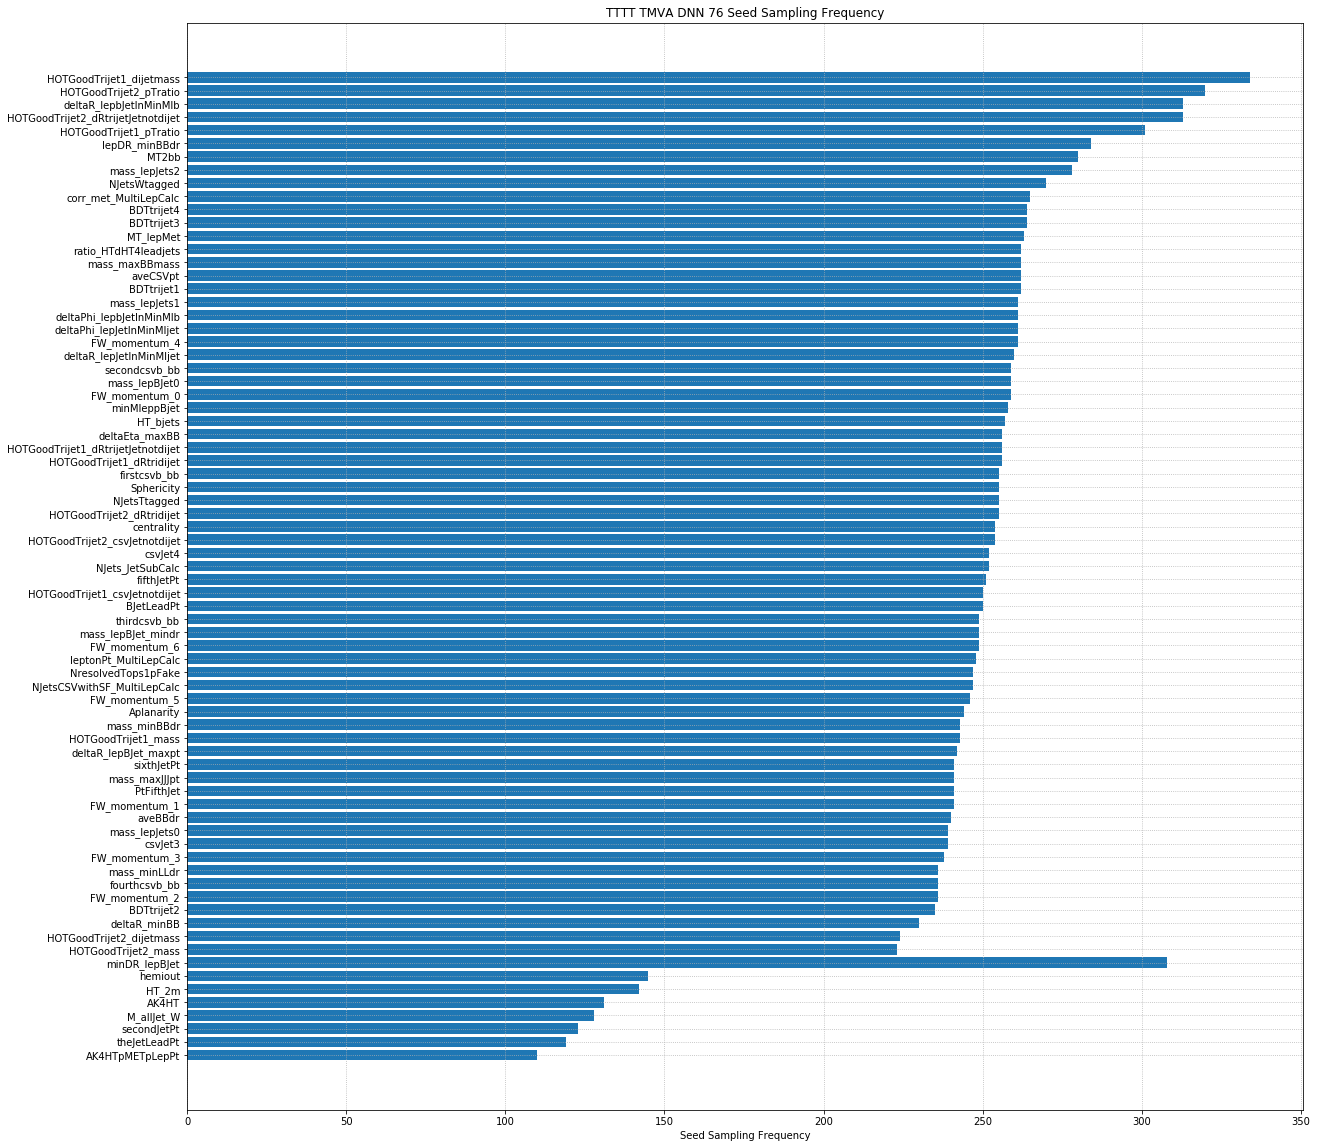

In [30]:
# Plot the sampling frequency of each variable

frequency_list_sort, variable_list_sort = zip(*sorted(zip(
    data["Freq."], data["Variable Name"]
)))

plt.close()
plt.figure(figsize=(20, 20))
plt.barh(variable_list_sort, frequency_list_sort)
plt.title("TTTT TMVA DNN " + str(nVars) + " Seed Sampling Frequency")
plt.grid(which="both", linestyle=":")
plt.xlabel("Seed Sampling Frequency")
plt.savefig(os.path.join(dataset_dir, "VariableImportanceSamplingFrequency_" + str(nVars) + "vars.png"))
plt.show()

## Plot ROC distributions

In [31]:
# Load the ROC differentials
importance_dict = np.load(os.path.join(dataset_dir, "ROC_hists_" + str(nVars) + "vars.npy"),
                          allow_pickle=True).item()
importance_keys = list(importance_dict.keys())
print("Available Variables:")
for k in importance_keys:
    print(" - {}".format(k))

key = input("Select Key from List: ")
if not key in importance_keys:
    raise ValueError("Key {} is not valid!".format(key))

Available Variables:
 - HOTGoodTrijet1_dijetmass
 - Aplanarity
 - deltaR_lepBJet_maxpt
 - csvJet3
 - csvJet4
 - firstcsvb_bb
 - Sphericity
 - NJetsTtagged
 - deltaEta_maxBB
 - mass_lepBJet0
 - mass_minBBdr
 - NresolvedTops1pFake
 - theJetLeadPt
 - NJetsCSVwithSF_MultiLepCalc
 - deltaR_lepbJetInMinMlb
 - HOTGoodTrijet2_pTratio
 - mass_minLLdr
 - mass_maxJJJpt
 - PtFifthJet
 - HT_2m
 - HT_bjets
 - corr_met_MultiLepCalc
 - HOTGoodTrijet1_dRtrijetJetnotdijet
 - deltaPhi_lepbJetInMinMlb
 - centrality
 - BDTtrijet4
 - leptonPt_MultiLepCalc
 - BJetLeadPt
 - AK4HTpMETpLepPt
 - BDTtrijet2
 - BDTtrijet3
 - mass_maxBBmass
 - NJets_JetSubCalc
 - BDTtrijet1
 - HOTGoodTrijet2_csvJetnotdijet
 - deltaR_lepJetInMinMljet
 - fifthJetPt
 - HOTGoodTrijet2_dRtrijetJetnotdijet
 - MT_lepMet
 - hemiout
 - MT2bb
 - sixthJetPt
 - HOTGoodTrijet2_mass
 - HOTGoodTrijet2_dijetmass
 - ratio_HTdHT4leadjets
 - deltaPhi_lepJetInMinMljet
 - HOTGoodTrijet2_dRtridijet
 - FW_momentum_2
 - FW_momentum_3
 - FW_momentum_0
 - F

Select Key from List:  Aplanarity


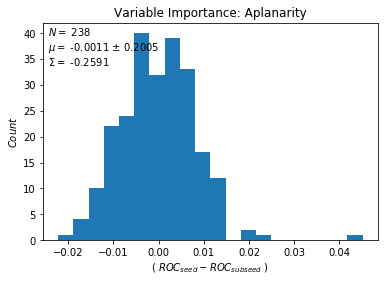

In [32]:
# Plot the distribution specified

plt.close()
plt.figure()
plt.title("Variable Importance: {}".format(key))
plt.annotate(u"$N=$ {}".format(
    len(importance_dict[key])),
    xycoords="axes pixels",
    xy=(5, 205)
)
plt.annotate(u"$\mu=$ {:.4f} \u00B1 {:.4f}".format(
    np.mean(importance_dict[key])*normalization,
    np.std(importance_dict[key])*normalization),
    xycoords="axes pixels",
    xy=(5, 190)
)
plt.annotate(u"$\Sigma=$ {:.4f}".format(
    np.sum(importance_dict[key])*normalization),
    xycoords="axes pixels",
    xy=(5,175)
)
plt.xlabel(r"( $ROC_{seed}-ROC_{subseed}$ )")
plt.ylabel(r"$Count$")
importance_dict[key] = np.array(importance_dict[key])
plt.hist(importance_dict[key], bins=20)
plt.show()